

## **Collision Avoidance MAC Protocol in Underwater Acoustic Sensor Network with Reinforcement Learning**

**Step 1: Packet rate adaptive based on reinforcement learning (PARE)**

**(i) Import Libraries**

In [ ]:
import random #library which allows for the generation of pseudo-random numbers
import numpy as np #library for powerful array manipulation capabilities and other numerical tools
import matplotlib.pyplot as plt #library for data visualization and plotting
import time #library provides various functions related to time measurement and performance analysi

**(ii) Node **

This code defines a class Node with methods for simulating a network node.

The __init__ method initializes the node's attributes, including its id, neighbors, p, packet_rate, load, and queue_length.

The **update_prob method** updates the probability of accessing the channel based on the success and collision rates. It takes two arguments, success_rate and collision_rate, and updates the p attribute accordingly.

The **update_packet_rate** method adjusts the transmission packet rate based on the estimated data packet load. It calculates the average of the queue_length values and compares it with the current load value. If the average load is higher than the current load, the packet_rate value is increased by 1. Conversely, if the average load is lower than the current load, the packet_rate value is decreased by 1. Finally, the load value is updated to be equal to the calculated average load.

The** transmit_packet method** simulates a packet transmission with a probability of success equal to the node's p attribute. If the transmission is successful, the method returns True. If there is a packet collision, it returns False.

The **receive_hello method **receives a "hello" message from a neighbor node and updates the node's state accordingly. It takes three arguments, neighbor_packet_rate, neighbor_prob, and neighbor_load. If the neighbor's packet rate is higher than the node's packet rate, the node's packet rate is updated. The node's p attribute is updated based on the neighbor's probability of accessing the channel, and the neighbor's estimated data packet load is added to the queue_length list. Finally, the node's update_packet_rate method is called to adjust the transmission packet rate based on the updated queue_length.

In [ ]:
class Node:
    def __init__(self, id, neighbors):
        self.id = id
        self.neighbors = neighbors
        self.p = 0.5  # initial probability of accessing the channel
        self.packet_rate = 1  # current transmission packet rate
        self.load = 1 # estimated data packet load
        self.queue_length = []

    def update_prob(self, success_rate, collision_rate):
        # update probability of accessing the channel based on success and collision rates
        self.p = (1 - self.p) * success_rate / (1 - self.p * success_rate - collision_rate)

    def update_packet_rate(self):
      """ It is responsible for adjusting the transmission packet rate based on the estimated data packet load, which is calculated
as the average of the queue length values. Function starts by checking if the 'queue_length' list has any values. If it does,
the average load is calculated as the sum of the queue length values divided by the length of the list. Then, the average load is
compared with the current 'load' value. If the average load is higher than the current load, the 'packet_rate' value is increased by 1.
Conversely, if the average load is lower than the current load, the 'packet_rate' value is decreased by 1.
Finally, the 'load' value is updated to be equal to the calculated average load. This method is likely part of a larger system that
involves network data transmission, where the goal is to adjust the packet rate to optimize the efficiency and throughput of the data
transmission."""

      # update transmission packet rate based on estimated data packet load
      if len(self.queue_length) > 0:
        avg_load = sum(self.queue_length) / len(self.queue_length)
        if avg_load > self.load:
            self.packet_rate += 1
        elif avg_load < self.load:
            self.packet_rate -= 1
        self.load = avg_load

    def transmit_packet(self):
        if random.random() < self.p:
            # simulate packet transmission
            delay = random.randint(*self.delay_range)
            time.sleep(delay / 1000.0)  # convert delay from ms to seconds
            return True
        else:
            # packet collision
            return False

    def receive_hello(self, neighbor_packet_rate, neighbor_prob, neighbor_load):
        # receive a "hello" message from a neighbor and update own state accordingly
        if neighbor_packet_rate > self.packet_rate:
            self.packet_rate = neighbor_packet_rate
        self.update_prob(neighbor_prob, 0)
        self.queue_length.append(neighbor_load)
        self.update_packet_rate()

**(iii) MDP**

This code defines a class named **MDP**, which stands for Markov Decision Process, a commonly used mathematical framework for decision making under uncertainty. The class has three attributes: 'states', 'actions', and 'rewards', which represent the set of states, actions, and rewards in the MDP.

The 'transition' method takes a state and an action as input and returns the next state according to the transition probability matrix. The transition probability matrix represents the probability of transitioning from one state to another state when taking a certain action. The next state is selected randomly based on the probabilities in the transition probability matrix.

The 'get_reward' method takes a state, an action, and a next state as input and returns the reward according to the reward matrix. The reward matrix represents the reward obtained when transitioning from one state to another state by taking a certain action.

The 'policy_iteration' method performs the policy iteration algorithm to find the optimal policy in the MDP. The algorithm alternates between policy evaluation and policy improvement. In policy evaluation, the values of each state are calculated by iterating over the states and actions and applying the Bellman equation, which calculates the expected value of being in a state and taking a certain action. In policy improvement, the policy is updated by selecting the action that maximizes the expected value of being in the current state and taking that action. This process is repeated until the policy becomes stable, meaning that no further updates to the policy are possible.

Finally, the 'policy_iteration' method returns the optimal policy, which is a vector that assigns an action to each state in the MDP.

In [ ]:
class MDP:
    def __init__(self, states, actions, rewards):
        self.states = states
        self.actions = actions
        self.rewards = rewards

    def transition(self, state, action):
        # given a state and action, return the next state according to the transition probability matrix
        return np.random.choice(self.states, p=self.transition_prob[state, action])

    def get_reward(self, state, action, next_state):
        # given a state, action, and next state, return the reward according to the reward matrix
        return self.rewards[state, action, next_state]

    #This function performs policy iteration to find the optimal policy.
    #The discount_factor parameter determines how much weight to give to future rewards.
    def policy_iteration(self, discount_factor=0.9):
        # perform policy iteration to find the optimal policy
        #Create an array to store the current policy. Initialize it with zeros, which represents the default policy.
        policy = np.zeros(len(self.states), dtype=np.int32)
        #Perform the policy iteration loop until the policy stabilizes.
        while True:
            # policy evaluation
            values = np.zeros(len(self.states))
            for i in range(100):
                for s in self.states:
                    v = 0
                    for a in self.actions:
                        next_s = self.transition(s, a)
                        r = self.get_reward(s, a, next_s)
                        v += self.transition_prob[s, a, next_s] * (r + discount_factor * values[next_s])
                    values[s] = v
            # policy improvement
            """Perform policy evaluation: calculate the value function for each state under the current policy. Here, the loop iterates
            100 times to improve the accuracy of the value function. For each state, calculate the value of each action and then take a
            weighted sum of the values based on the transition probabilities to get the value of that state."""
            policy_stable = True
            for s in self.states:
                old_action = policy[s]
                best_value = -float('inf')
                for a in self.actions:
                    next_s = self.transition(s, a)
                    r = self.get_reward(s, a, next_s)
                    v = r + discount_factor * values[next_s]
                    if v > best_value:
                        best_value = v
                        best_action = a
                policy[s] = best_action
                if old_action != best_action:
                    policy_stable = False
            if policy_stable:
                break
        return policy
        """Perform policy improvement: update the policy by selecting the action that has the highest value for each state. Check whether
        the policy has stabilized by comparing the old policy with the new policy. If the policy has stabilized, break out of the loop."""

**(iv) Simulate the main function**

This code simulates a network of nodes communicating with each other through a shared channel. The simulation starts by creating a number of nodes and connecting them randomly. Then, each node receives "hello" messages from its neighbors, which contain information about their packet rates, probabilities, and loads.

Next, the code calculates the collision rate for each node. The collision rate is defined as the number of neighbors with a higher probability of transmitting in the same time slot divided by the total number of neighbors. If a node has no neighbors, its collision rate is set to zero.

After calculating the collision rates, the code updates the probabilities and packet rates for each node based on the collision rate and a predefined success rate. The update is performed using a function called update_prob and update_packet_rate.

Finally, the code simulates the transmission of packets. Each node transmits a number of packets equal to its packet rate. The packets are transmitted in time slots, and the delay between the start of the slot and the transmission of the packet is randomly generated. If a packet is lost due to channel errors or there is a collision with another packet, it is not successfully transmitted. If a packet is successfully transmitted, the energy consumption for the transmitting node is recorded.

In [ ]:
def simulate(num_nodes, num_packets, slot_size, delay_range):
    # create nodes and connect them randomly
    nodes = [Node(i, []) for i in range(num_nodes)]
    print("Nodes:", nodes)
    # receive "hello" messages from neighbors
    for node in nodes:
        neighbor_packet_rate = node.packet_rate
        print("Packet rate:",neighbor_packet_rate)
        neighbor_prob = node.p
        print("Proability:",neighbor_prob)
        neighbor_load = node.load
        print("Load:",neighbor_load)
        for neighbor in node.neighbors:
            if neighbor.id != node.id:
                neighbor.receive_hello(neighbor_packet_rate, neighbor_prob, neighbor_load)

    # calculate collision rate for each node
    collision_rates = []
    for node in nodes:
        #collision_rate = sum([1 for n in node.neighbors if n.p > node.p]) / len(node.neighbors)
        collision_rate = sum([1 for n in node.neighbors if n.p > node.p]) / len(node.neighbors) if len(node.neighbors) > 0 else 0
        collision_rates.append(collision_rate)
        print("Collision Rates:",collision_rates)

    # update probabilities and packet rates for each node
    for node, collision_rate in zip(nodes, collision_rates):
        node.update_prob(success_rate, collision_rate)
        node.update_packet_rate()
        print("Update probility:", node.update_prob(success_rate, collision_rate))
        print("Update packet rate:",node.update_packet_rate())

    # collect data packets
    for node in nodes:
        for i in range(node.packet_rate):
            packet_delay = random.randint(1, delay_range)
            print("Packet delay:",packet_delay)
            if packet_delay == delay_range:
                # packet lost due to channel error
                continue
            slot = int((i * node.packet_rate + node.id) % slot_size)
            print("Slot:",slot)
            if slot < packet_delay:
                # packet collision
                continue
            # packet successfully transmitted
            energy_consumption[node.id][i] += 1

**Simulate testbench with paramaters**

In [ ]:
num_nodes = 10
num_packets = 100
slot_size = 30
delay_range = 5
success_rate = 0.4

In [ ]:
energy_consumption = [[0 for j in range(num_packets)] for i in range(num_nodes)]
print("Energy consumption:", energy_consumption)

Energy consumption: [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
simulate(num_nodes, num_packets, slot_size, delay_range)

Nodes: [<__main__.Node object at 0x7fccd9307af0>, <__main__.Node object at 0x7fccd9307ca0>, <__main__.Node object at 0x7fccd9307970>, <__main__.Node object at 0x7fccd93049d0>, <__main__.Node object at 0x7fccd9307e50>, <__main__.Node object at 0x7fccd93079a0>, <__main__.Node object at 0x7fccd9304a00>, <__main__.Node object at 0x7fccd9305990>, <__main__.Node object at 0x7fccd9307a90>, <__main__.Node object at 0x7fccd9307a30>]
Packet rate: 1
Proability: 0.5
Load: 1
Packet rate: 1
Proability: 0.5
Load: 1
Packet rate: 1
Proability: 0.5
Load: 1
Packet rate: 1
Proability: 0.5
Load: 1
Packet rate: 1
Proability: 0.5
Load: 1
Packet rate: 1
Proability: 0.5
Load: 1
Packet rate: 1
Proability: 0.5
Load: 1
Packet rate: 1
Proability: 0.5
Load: 1
Packet rate: 1
Proability: 0.5
Load: 1
Packet rate: 1
Proability: 0.5
Load: 1
Collision Rates: [0]
Collision Rates: [0, 0]
Collision Rates: [0, 0, 0]
Collision Rates: [0, 0, 0, 0]
Collision Rates: [0, 0, 0, 0, 0]
Collision Rates: [0, 0, 0, 0, 0, 0]
Collision R

Visulize the defined network

**Graphs**

Streaming output truncated to the last 5000 lines.
Update probility: None
Update packet rate: None
Update probility: None
Update packet rate: None
Update probility: None
Update packet rate: None
Update probility: None
Update packet rate: None
Update probility: None
Update packet rate: None
Update probility: None
Update packet rate: None
Update probility: None
Update packet rate: None
Packet delay: 5
Packet delay: 4
Slot: 1
Packet delay: 5
Packet delay: 1
Slot: 3
Packet delay: 2
Slot: 4
Packet delay: 1
Slot: 5
Packet delay: 4
Slot: 6
Packet delay: 3
Slot: 7
Packet delay: 1
Slot: 8
Packet delay: 3
Slot: 9
Nodes: [<__main__.Node object at 0x7fccf4548a90>, <__main__.Node object at 0x7fccf45480d0>, <__main__.Node object at 0x7fccf4549ed0>, <__main__.Node object at 0x7fccf454a650>, <__main__.Node object at 0x7fccf4548fa0>, <__main__.Node object at 0x7fccf454bdf0>, <__main__.Node object at 0x7fccf4549a50>, <__main__.Node object at 0x7fccf454a0e0>, <__main__.Node object at 0x7fccf45497e0>, <__

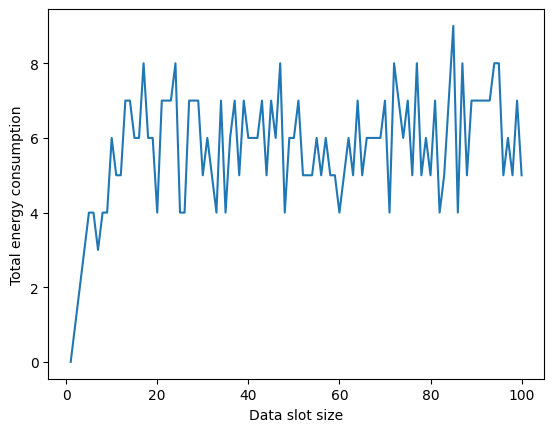

In [ ]:
# Comparison graph of total energy consumption for data collection under different data slot size
y_values = []
for slot_size in range(1, num_packets + 1):
    energy_consumption = [[0] * num_packets for _ in range(num_nodes)]
    simulate(num_nodes, num_packets, slot_size, delay_range)
    y_values.append(sum([sum(row) for row in energy_consumption]))

x_values = list(range(1, len(y_values) + 1))
plt.plot(x_values, y_values)
plt.xlabel("Data slot size")
plt.ylabel("Total energy consumption")
plt.show()


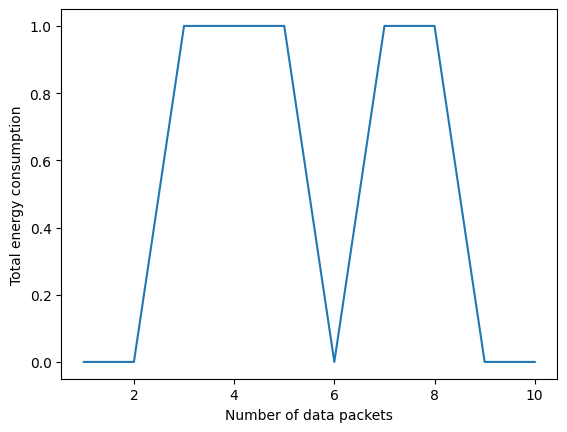

In [ ]:
# plot graphs
# Comparison graph of total energy consumption for data collection under different data packet numbers
y_values = [sum(energy_consumption[i]) for i in range(num_nodes)]
plt.plot(range(1, num_nodes+1), y_values)
plt.xlabel("Number of data packets")
plt.ylabel("Total energy consumption")
plt.show()


Nodes: [<__main__.Node object at 0x7fccf45e8250>, <__main__.Node object at 0x7fccf45e8400>, <__main__.Node object at 0x7fccf45ebd00>, <__main__.Node object at 0x7fccfcd1bfd0>, <__main__.Node object at 0x7fccfcd1a9b0>, <__main__.Node object at 0x7fccfcd1b670>, <__main__.Node object at 0x7fccfcd19300>, <__main__.Node object at 0x7fccfcd1b8e0>, <__main__.Node object at 0x7fccfcd1b6d0>, <__main__.Node object at 0x7fccfcd1ac80>]
Packet rate: 1
Proability: 0.5
Load: 1
Packet rate: 1
Proability: 0.5
Load: 1
Packet rate: 1
Proability: 0.5
Load: 1
Packet rate: 1
Proability: 0.5
Load: 1
Packet rate: 1
Proability: 0.5
Load: 1
Packet rate: 1
Proability: 0.5
Load: 1
Packet rate: 1
Proability: 0.5
Load: 1
Packet rate: 1
Proability: 0.5
Load: 1
Packet rate: 1
Proability: 0.5
Load: 1
Packet rate: 1
Proability: 0.5
Load: 1
Collision Rates: [0]
Collision Rates: [0, 0]
Collision Rates: [0, 0, 0]
Collision Rates: [0, 0, 0, 0]
Collision Rates: [0, 0, 0, 0, 0]
Collision Rates: [0, 0, 0, 0, 0, 0]
Collision R

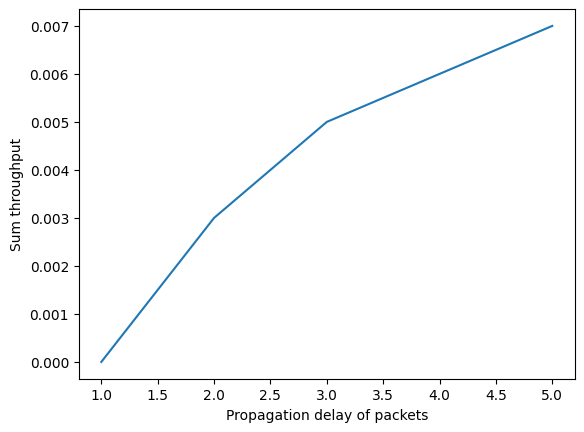

In [ ]:
# graph of Sum throughput when the node coexists with other nodes with different delays
delays = range(1, delay_range + 1)
y_values = []
for delay in delays:
    energy_consumption = [[0] * num_packets for _ in range(num_nodes)]
    simulate(num_nodes, num_packets, slot_size, delay)
    sum_throughput = sum([sum(row) for row in energy_consumption])
    y_values.append(sum_throughput / (num_nodes * num_packets))
plt.plot(delays, y_values)
plt.xlabel("Propagation delay of packets")
plt.ylabel("Sum throughput")
plt.show()

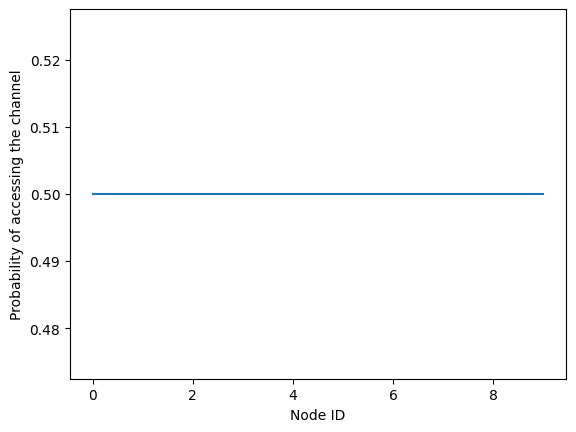

In [ ]:
y_values = []
nodes = []
for i in range(num_nodes):
    nodes.append(Node(slot_size, delay_range))  # remove num_packets argument
for node in nodes:
    y_values.append(node.p)
plt.plot(list(range(num_nodes)), y_values)
plt.xlabel("Node ID")
plt.ylabel("Probability of accessing the channel")
plt.show()


In [ ]:
y_values = []
if len(nodes) > 0:
    for node in nodes:
        if node.id in energy_consumption:
            energy_consumption_node = sum(energy_consumption[node.id])
            if num_packets > 0:
                throughput = energy_consumption_node / num_packets
                if node.packet_rate > 0:
                    energy_efficiency = throughput / node.packet_rate
                    y_values.append(energy_efficiency)
    if len(y_values) > 0:
        plt.plot(list(range(len(y_values))), y_values)
        plt.xlabel("Node ID")
        plt.ylabel("Energy efficiency")
        plt.show()
    else:
        print("Error: no valid energy efficiency values calculated.")
else:
    print("Error: nodes list is empty.")


Error: no valid energy efficiency values calculated.


**Vizulize the defined network topology**

The network graph is represented as a set of nodes and edges. Each **node** represents a ** device**, and the **edges** represent the **connections between the devices**.

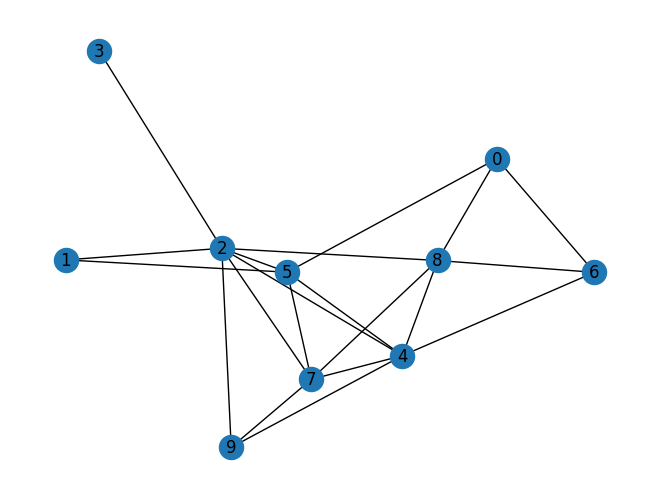

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Generate a graph with num_nodes nodes
G = nx.gnm_random_graph(num_nodes, num_nodes * 2)

# Position nodes using spring layout
pos = nx.spring_layout(G)

# Draw graph
nx.draw(G, pos, with_labels=True)
plt.show()

*This code defines a simulation of a network with a certain number of nodes, each capable of sending and receiving packets. The simulation generates a random delay for each packet, and plots the network topology, the packets sent by each node, and the delay experienced by each packet.*
The plot_nodes function plots the nodes in the network. It takes as input the number of nodes num_nodes, and uses the plt.plot() function to draw a horizontal line for each node.

The **plot_packets function** plots the packets sent by each node. It takes as input the number of packets num_packets, the number of nodes num_nodes, the slot size slot_size, the energy consumption of each node for each packet energy_consumption, and the delay for each packet delays. For each packet, it calculates its position in the network based on its delay, and draws a line representing the packet. The line is red if the energy consumption of the node for that packet is greater than 0, and blue otherwise.

The **plot_delay function** plots the delay experienced by each packet. It takes as input the number of packets num_packets and the delay for each packet delays, and uses the plt.bar() function to draw a bar chart representing the delay of each packet.

The **simulate function** performs the network simulation. It takes as input the number of nodes num_nodes, the number of packets num_packets, the slot size slot_size, and the range of delays delay_range. It first initializes a 2D list energy_consumption to store the energy consumption of each node for each packet. It then generates a random delay for each packet using the random.randint() function. It then plots the network topology and the packets sent by each node using the plot_nodes() and plot_packets() functions. Finally, it plots the delay experienced by each packet using the plot_delay() function. The success rate of sending packets is hardcoded to 0.4.

In [ ]:
import random
import matplotlib.pyplot as plt

def plot_nodes(num_nodes):
    # Plot nodes
    for i in range(num_nodes):
        plt.plot([0, num_packets*slot_size], [i+1, i+1], linestyle="--", color="grey")

def plot_packets(num_packets, num_nodes, slot_size, energy_consumption, delays):
    # Plot packets
    for i in range(num_packets):
        x = i*slot_size + delays[i]
        for j in range(num_nodes):
            y = j+1
            energy = energy_consumption[j][i]
            if energy > 0:
                plt.plot([x, x+slot_size], [y, y], linewidth=energy, color="red")
            else:
                plt.plot([x, x+slot_size], [y, y], linewidth=1, color="blue")

def plot_delay(num_packets, delays):
    # Plot delay
    plt.figure(figsize=(10, 3))
    plt.title("Packet Delay")
    plt.xlabel("Packet")
    plt.ylabel("Delay (slots)")
    plt.bar(range(num_packets), delays)
    plt.show()

def simulate(num_nodes, num_packets, slot_size, delay_range):
    energy_consumption = [[0 for j in range(num_packets)] for i in range(num_nodes)]
    print("Energy consumption:", energy_consumption)

    success_rate = 0.4

    # Generate random delay values
    delays = []
    for i in range(num_packets):
        delays.append(random.randint(0, delay_range))

    # Plot network topology
    plt.figure(figsize=(10, 6))
    plt.title("Network Topology")
    plt.xlabel("Time (slots)")
    plt.ylabel("Node")
    plt.ylim(0, num_nodes+1)

    plot_nodes(num_nodes)
    plot_packets(num_packets, num_nodes, slot_size, energy_consumption, delays)

    # Add legend
    plt.plot([], [], linewidth=1, color="blue", label="Packet")
    plt.plot([], [], linewidth=3, color="red", label="Packet with energy consumption")
    plt.legend()

    plt.show()

    # Plot delay
    plot_delay(num_packets, delays)


Energy consumption: [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

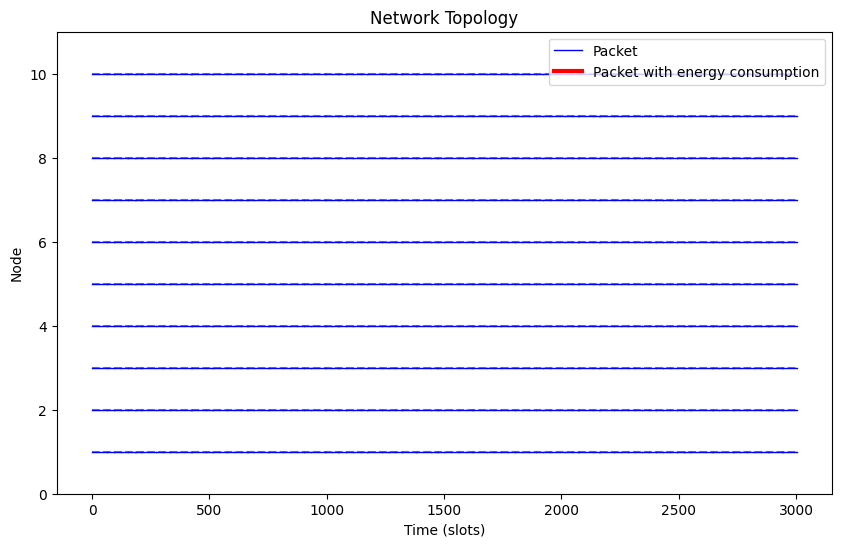

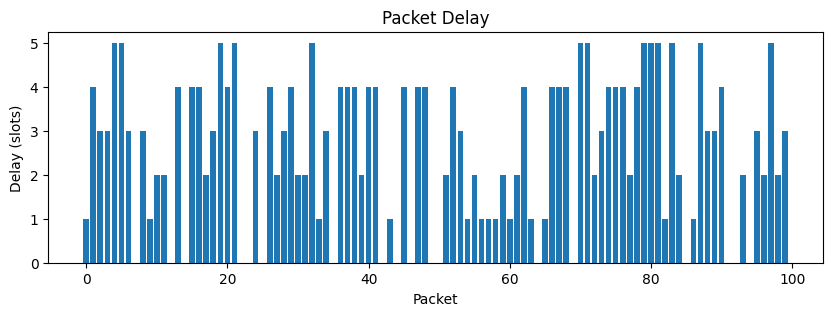

In [ ]:
simulate(num_nodes, num_packets, slot_size, delay_range)